# Illustrating Motion Primitive

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
import mpl_toolkits.mplot3d.art3d as art3d

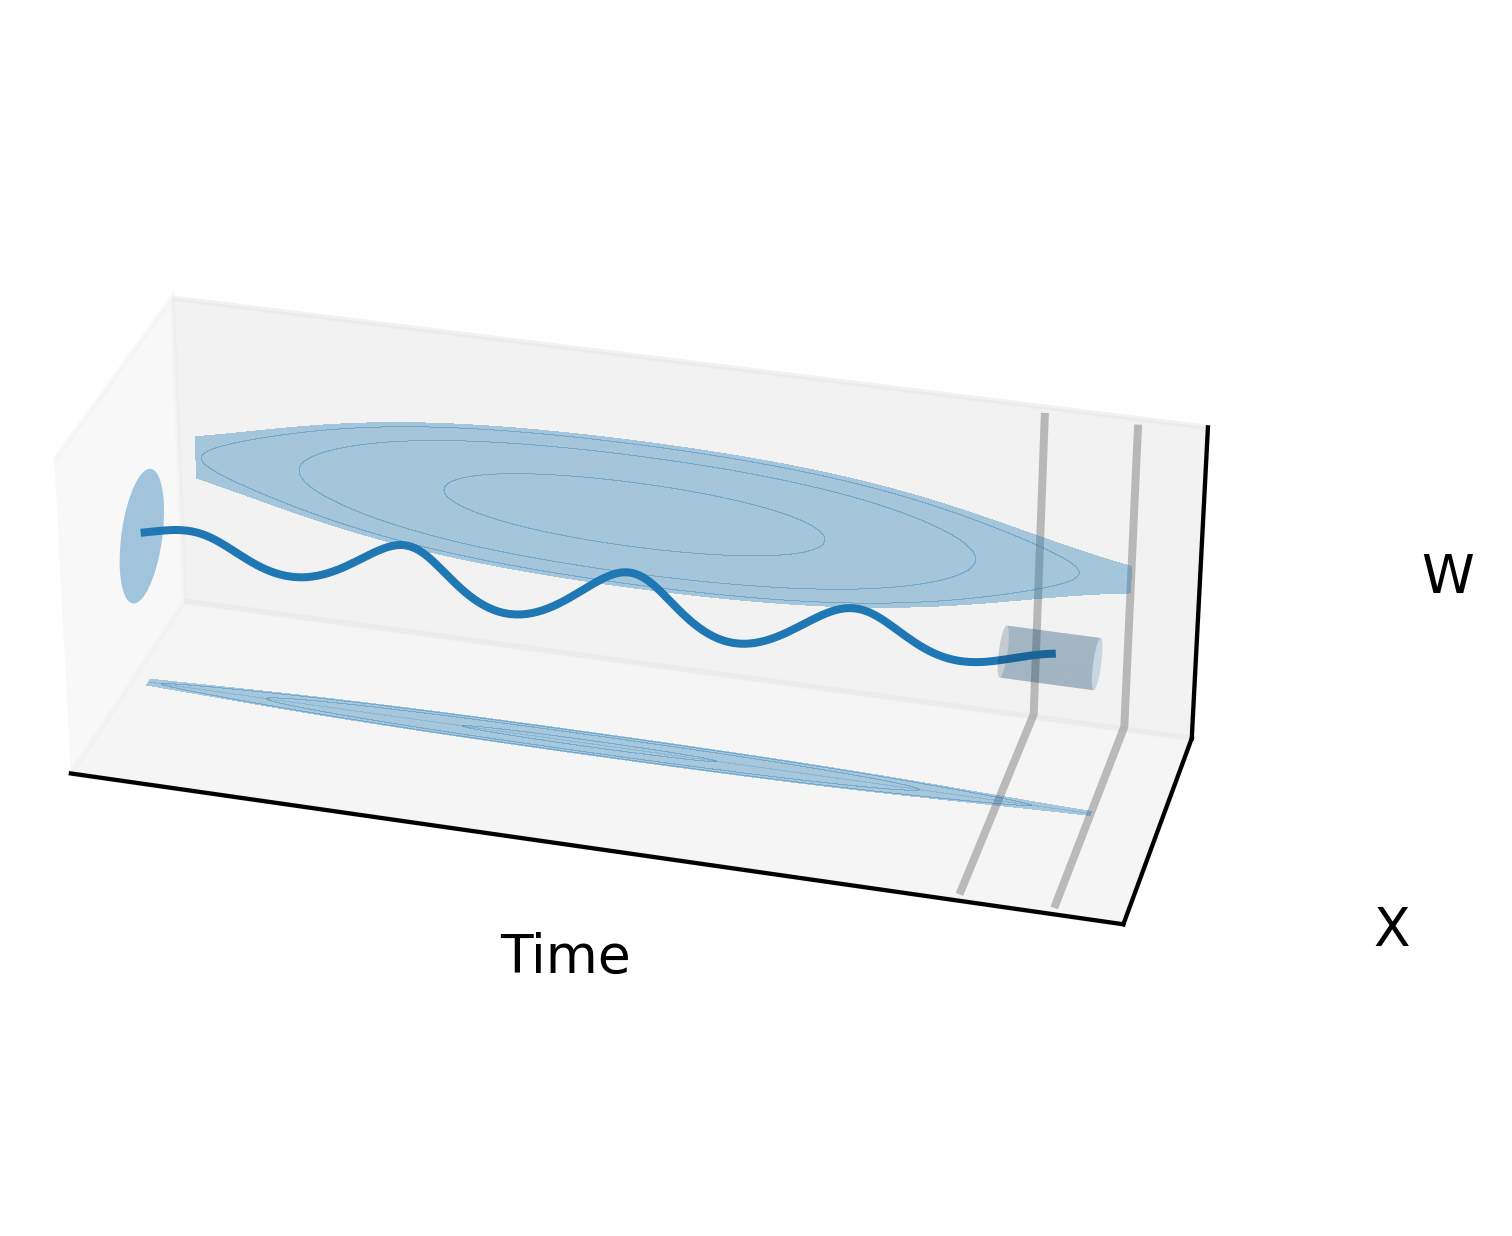

In [9]:
fig = plt.figure(dpi=96*4)
ax = fig.gca(projection='3d')

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
blue = colors[0]

# Duration
x = [9.5, 9.5, 9.5]
x2 = [10.5, 10.5, 10.5]
y = [-1,1,1]
z = [-1,-1,1]
ax.plot(x, y, z, alpha=0.5, color="gray")
ax.plot(x2, y, z, alpha=0.5, color="gray")

# trajectory
samples = 200
theta = np.linspace(-4 * np.pi, 4 * np.pi, samples)
x = np.linspace(0, 10, samples)
r = 1/(np.exp(((5-x)/3)**2) + 5)
z = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='trajectory')

# precondition
p = Circle((0, 0), 0.4, alpha=0.4, fill=blue)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="x")

# postcondition (cylinder)
# adapted from https://stackoverflow.com/a/49311446
def cylinder(xCenter,yCenter,radius,zMin, zMax):
    z = np.linspace(zMin, zMax, samples)
    theta = np.linspace(0, 2*np.pi, samples)
    theta_grid, z_grid=np.meshgrid(theta, z)
    x_grid = radius*np.cos(theta_grid) + xCenter
    y_grid = radius*np.sin(theta_grid) + yCenter
    return x_grid,y_grid,z_grid

Zc,Yc,Xc = cylinder(0,0,0.15,9.5,10.5)
ax.plot_surface(Xc, Yc, Zc, alpha=0.2, color=blue)

def cylinder2(xCenter,yCenter,radius,zMin, zMax):
    z = np.linspace(zMin, zMax, samples)
    theta = np.linspace(0, 2*np.pi, samples)
    theta_grid, z_grid=np.meshgrid(theta, z)
    r = radius * 1.5/(np.exp(((5-z_grid)/3)**2) + 5)
    x_grid = r*np.cos(theta_grid) + xCenter
    y_grid = r*np.sin(theta_grid) + yCenter
    return x_grid,y_grid,z_grid

# Guarantee
Zc,Yc,Xc = cylinder2(0,0,0.5,0,10.5)
ax.contourf(Xc, Yc, Zc, zdir='z', offset=-1, alpha=0.2, colors=blue)

# Assume
Zc,Yc,Xc = cylinder2(0,0,2,0,10.5)
ax.contourf(Xc, Yc, Zc, zdir='y', offset=1, alpha=0.2, colors=blue)

ax.set_xlabel('Time')
ax.axes.xaxis.set_ticks([])
ax.axes.xaxis.set_ticklabels([])
ax.set_xlim(0, 11)

ax.set_ylabel('X')
ax.axes.yaxis.set_ticks([])
ax.axes.yaxis.set_ticklabels([])
ax.set_ylim(-1, 1)

ax.set_zlabel('W')
ax.axes.zaxis.set_ticks([])
ax.axes.zaxis.set_ticklabels([])
ax.set_zlim(-1, 1)

ax.set_box_aspect((3, 1, 1))
#ax.legend()
ax.view_init(elev=30, azim=285)
plt.show()

In [10]:
fig.savefig("motion_ref.svg", format='svg')